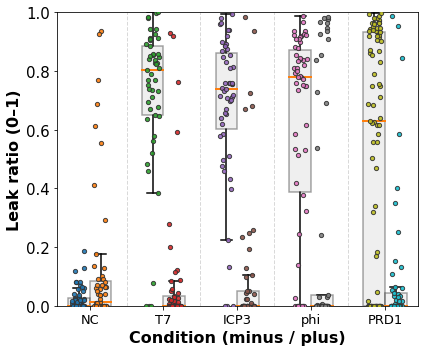

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_path = "holin_all_the_data.xlsx"

df_raw = pd.read_excel(file_path)

# Define pairs (minus, plus), in the order you want to show them
pairs = [
    ("minus-NC",   "plus-NC"),
    ("minus-T7",   "plus-T7"),
    ("minus-ICP3", "plus-ICP3"),
    ("minus-phi",  "plus-phi"),
    ("minus-PRD1", "plus-PRD1"),
]
pair_labels = ["NC", "T7", "ICP3", "phi", "PRD1"]
all_cols = [c for pair in pairs for c in pair]

# Build data vectors for each column (drop NaNs, coerce to float)
data_for_box = [pd.to_numeric(df_raw[c], errors="coerce").dropna().values for c in all_cols]

# --------- Compute positions so "minus/plus" are close, pairs far apart ---------
n_pairs = len(pairs)
half_sep = 0.25                 # half the horizontal separation within a pair (total within-pair sep = 0.5)
pair_gap = 1.2                  # extra gap between pairs
center_step = 2*half_sep + pair_gap
centers = np.arange(n_pairs) * center_step

# Positions for each box, in the same order as `all_cols`
positions = []
for cx in centers:
    positions.append(cx - half_sep)  # minus
    positions.append(cx + half_sep)  # plus

# --------- Plot ---------
fig, ax = plt.subplots(figsize=(6, 5))

box = ax.boxplot(
    data_for_box,
    positions=positions,
    widths=0.5,
    patch_artist=True,
    showfliers=False,                # hide automatic outlier dots (we show all raw points ourselves)
    medianprops=dict(linewidth=2),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    boxprops=dict(linewidth=1.5),
)

# Light fills; optionally tint minus/plus slightly differently
for i, patch in enumerate(box["boxes"]):
    # minus entries are at even indices (0,2,4,...) in all_cols; plus at odd
    is_plus = (i % 2 == 1)
    patch.set_alpha(0.35)
    patch.set_facecolor("lightgray" if not is_plus else "gainsboro")

# Jittered points atop each box
rng = np.random.default_rng(123)
for i, vals in enumerate(data_for_box):
    jitter = rng.uniform(-0.15, 0.15, size=len(vals))
    ax.scatter(np.full_like(vals, positions[i], dtype=float) + jitter,
               vals, s=18, marker="o", zorder=3, alpha=0.9, edgecolors="0.2")

# X-axis: center ticks per pair (labels = NC, T7, ...)
ax.set_xticks(centers)
ax.set_xticklabels(pair_labels, rotation=0)

# Labels and limits
ax.set_xlabel("Condition (minus / plus)", fontsize=16, fontweight="bold")
ax.set_ylabel("Leak ratio (0–1)", fontsize=16, fontweight="bold")
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylim(0, 1)
ax.margins(x=0.04)

# Optional vertical separators between pairs (light guide lines)
for cx in centers[1:]:
    ax.axvline(x=cx - (half_sep + pair_gap/2), color="0.85", lw=1, ls="--", zorder=0)

plt.tight_layout()
#plt.savefig("holin_leakratio_boxplot.svg", format="svg")
plt.show()